# Fuzzy inference system in Digital Camera

Krish Meshram 2018140038

Kaustubh Patil 2018140044

Bhargav Rao 2018140048

Atharva Shirode 2018140058


In [ ]:
!pip install -U scikit-fuzzy

#Importing libraries

In [ ]:
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Inputs
brightness

iso

distance

type

Brightness:-

very low = Overcast,Dull   [0,30]

low = Mainly cloudy       [20,50]

medium = Party cloudy     [40,60]

high = hazy sun           [50,80]

very high = bright sunny  [70,100]











Distance:-

very close < 100 cm ,

close between 75 cm to 200 cm ,

medium between 175 cm to 300 cm ,

far between 275 cm to 425 cm ,

very far between >400 cm


Sensitivity:

 Low [100,600],

  Medium [400,1000], 

  high[800,1600]

# Outputs

Exposure value (EV):

Low: 11-14

Medium: 13-16

High: 15-18 

Aperture(f):

Very Low: 0-8

Low:  6-12


High: 10-16

Very High: 14-22

Shutter speed(s):

Very Low: 0-250

Low: 200-400

Medium: 350-550

High: 500-800

Very High: 750-1000




Focal Length(f):

Low: 0-50

Medium: 25-75

High: 50-100

#Defining universe for input & output

In [ ]:
#fuzzy inputs
Brightness= ctrl.Antecedent(np.arange(0,101,1),'Brightness')
Sensitivity= ctrl.Antecedent(np.arange(100,1601,1),'Sensitivity')
Distance= ctrl.Antecedent(np.arange(0,501,1),'Distance')
# Type= ctrl.Antecedent(np.arange(0,3,1),'Type')
# Type= ctrl.Antecedent(np.arange(0,101,1),'Type')

In [ ]:
#fuzzy outputs
Exposure_Value = ctrl.Consequent(np.arange(11, 19, 1), 'Exposure_Value')
Aperture = ctrl.Consequent(np.arange(0, 23, 1), 'Aperture')
Shutter_speed = ctrl.Consequent(np.arange(0, 1001, 1), 'Shutter_speed')
Focal_Length = ctrl.Consequent(np.arange(0, 101, 1), 'Focal_Length')

#Fuzzification(Defining Membership Functions)

In [ ]:
Brightness['Very Low'] = fuzz.trimf(Brightness.universe , [0,0,30])
Brightness['Low'] = fuzz.trimf(Brightness.universe , [20,35,50])
Brightness['Medium'] = fuzz.trimf(Brightness.universe , [40,50,60])
Brightness['High'] = fuzz.trimf(Brightness.universe , [50,75,80])
Brightness['Very High'] = fuzz.trimf(Brightness.universe , [70,101,101])

In [ ]:
Sensitivity['Low'] = fuzz.trimf(Sensitivity.universe , [100,100,600])
Sensitivity['Medium'] = fuzz.trimf(Sensitivity.universe , [400,600,1000])
Sensitivity['High'] = fuzz.trimf(Sensitivity.universe , [800,1601,1601])

In [ ]:
Distance['Very Close'] = fuzz.trimf(Distance.universe , [0,0,100])
Distance['Close'] = fuzz.trimf(Distance.universe , [75,150,200])
Distance['Medium'] = fuzz.trimf(Distance.universe , [175,250,300])
Distance['Far'] = fuzz.trimf(Distance.universe , [275,350,425])
Distance['Very Far'] = fuzz.trimf(Distance.universe , [400,501,501])

In [ ]:
# Type['Sports'] = fuzz.trimf(Type.universe , [0,0,1])
# Type['Portrait'] = fuzz.trimf(Type.universe , [1,1,2])
# Type['Landscape'] = fuzz.trimf(Type.universe , [2,3,3])
# # Type['Sports'] = fuzz.trimf(Type.universe , [0,0,30])
# Type['Portrait'] = fuzz.trimf(Type.universe , [20,50,80])
# Type['Landscape'] = fuzz.trimf(Type.universe , [70,101,101])

In [ ]:
Exposure_Value['Low'] = fuzz.trimf(Exposure_Value.universe , [11,11,14])
Exposure_Value['Medium'] = fuzz.trimf(Exposure_Value.universe , [13,15,16])
Exposure_Value['High'] = fuzz.trimf(Exposure_Value.universe , [15,19,19])

In [ ]:
Shutter_speed['Very Low'] = fuzz.trimf(Shutter_speed.universe , [0,0,250])
Shutter_speed['Low'] = fuzz.trimf(Shutter_speed.universe , [200,300,400])
Shutter_speed['Medium'] = fuzz.trimf(Shutter_speed.universe , [350,450,550])
Shutter_speed['High'] = fuzz.trimf(Shutter_speed.universe , [500,700,800])
Shutter_speed['Very High'] = fuzz.trimf(Shutter_speed.universe , [750,1001,1001])

In [ ]:
Aperture['Very Low'] = fuzz.trimf(Aperture.universe , [0,0,8])
Aperture['Low'] = fuzz.trimf(Aperture.universe , [6,9,12])
Aperture['High'] = fuzz.trimf(Aperture.universe , [10,12,16])
Aperture['Very High'] = fuzz.trimf(Aperture.universe , [14,23,23])

In [ ]:
Focal_Length['Low'] = fuzz.trimf(Focal_Length.universe , [0,0,40])
Focal_Length['Medium'] = fuzz.trimf(Focal_Length.universe , [25,50,75])
Focal_Length['High'] = fuzz.trimf(Focal_Length.universe , [65,101,101])

#Visualizing membership functions

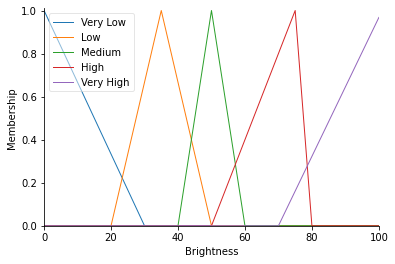

In [ ]:
#Inputs
Brightness.view()

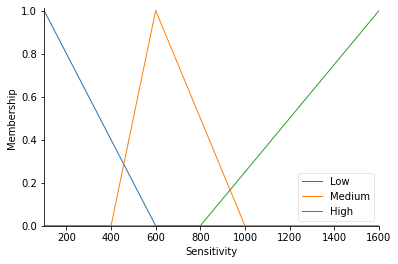

In [ ]:
Sensitivity.view()

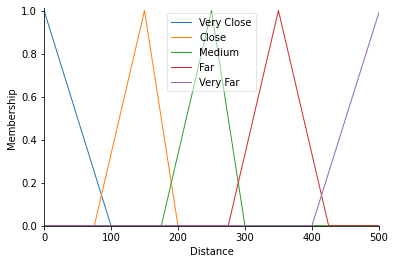

In [ ]:
Distance.view()

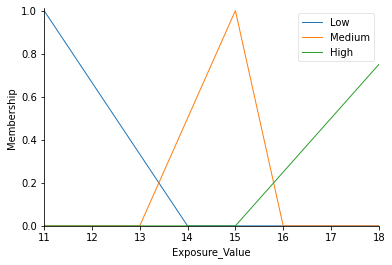

In [ ]:
#Outputs
Exposure_Value.view()

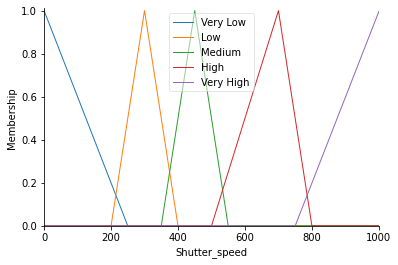

In [ ]:
Shutter_speed.view()

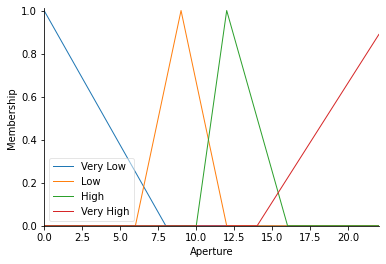

In [ ]:
Aperture.view()

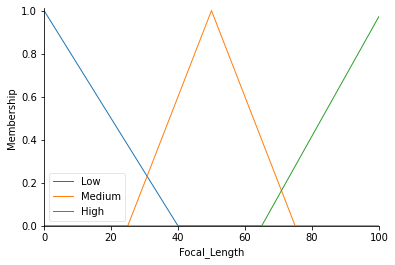

In [ ]:
Focal_Length.view()

#Defining Fuzzy Rule Base

In [ ]:
def get_Exposurevalues_Rules():
  rule1 = ctrl.Rule(Brightness['Very Low']  | Sensitivity['Low'] & Distance['Very Far'] ,Exposure_Value['Low'] )

  rule2 = ctrl.Rule(Brightness['Very High'] & Sensitivity['Medium'] & Distance['Far'] , Exposure_Value['High'] )
  
  rule3 = ctrl.Rule(Brightness['Medium']  & Sensitivity['Low'] | Distance['Very Close'] , Exposure_Value['Medium'] )
  
  rule4 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] | Distance['Far'] , Exposure_Value['Medium'] )
  
  rule5 = ctrl.Rule(Brightness['Very High']  & Sensitivity['Medium'] & Distance['Close'] , Exposure_Value['High'] )
  
  rule6= ctrl.Rule(Brightness['Medium']  | Sensitivity['Low'] & Distance['Medium'] , Exposure_Value['Low'] )
  
  rule7 = ctrl.Rule(Brightness['Very Low']  & Sensitivity['High'] | Distance['Far'] ,Exposure_Value['High'])
  
  rule8 = ctrl.Rule(Brightness['Very High']  | Sensitivity['Low'] & Distance['Very Far'] , Exposure_Value['High'] )
  
  rule9 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] & Distance['Close'] , Exposure_Value['Low'])
  
  
  rule11= ctrl.Rule(Brightness['Medium']  & Sensitivity['High'] | Distance['Close'], Exposure_Value['High'] )
  
  rule12= ctrl.Rule(Brightness['High']  & Sensitivity['High'] & Distance['Medium'], Exposure_Value['High'] )

  rule13= ctrl.Rule(Brightness['High'] | Sensitivity['High'] & Distance['Far'], Exposure_Value['High'] ) 
  
  rule14= ctrl.Rule(Brightness['Medium'] & Sensitivity['Medium'] & Distance['Far'], Exposure_Value['High'] )
  
  rule15= ctrl.Rule(Brightness['High']  | Sensitivity['Low'] & Distance['Very Close'], Exposure_Value['Medium'] )
  
  rule16= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Medium'] | Distance['Close'], Exposure_Value['Medium'])

  rule17= ctrl.Rule(Brightness['Low']  | Sensitivity['High'] & Distance['Medium'], Exposure_Value['High'] )

  rule18= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Low'] & Distance['Close'], Exposure_Value['Low'] )
  
 

  return [rule1, rule2, rule3, rule4, rule5, rule6 ,rule7 ,rule8 ,rule9 ,rule11 ,rule12 ,rule13 ,rule14 ,rule15 ,rule16 ,rule17 ,rule18]
  

In [ ]:
def get_Aperturevalues_Rules():
  rule1 = ctrl.Rule(Brightness['Very Low']  | Sensitivity['Low'] & Distance['Very Far'] , Aperture['Very Low'])
  
  rule2 = ctrl.Rule(Brightness['Very High'] & Sensitivity['Medium'] & Distance['Far'] , Aperture['High'] )
  
  rule3 = ctrl.Rule(Brightness['Medium']  & Sensitivity['Low'] | Distance['Very Close'] ,  Aperture['Very Low'] )
  
  rule4 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] | Distance['Far'] ,Aperture['Very Low'])
  
  rule5 = ctrl.Rule(Brightness['Very High']  & Sensitivity['Medium'] & Distance['Close'] , Aperture['Very High'] )
  
  rule6= ctrl.Rule(Brightness['Medium']  | Sensitivity['Low'] & Distance['Medium'] , Aperture['Very Low'])
  
  rule7 = ctrl.Rule(Brightness['Very Low']  & Sensitivity['High'] | Distance['Far']  , Aperture['Low'])
  
  rule8 = ctrl.Rule(Brightness['Very High'] & Sensitivity['Low'] | Distance['Very Far'] , Aperture['High'])
  
  rule9 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] & Distance['Close'] , Aperture['Low'] )
  
  
  
  rule11= ctrl.Rule(Brightness['Medium']  & Sensitivity['High'] | Distance['Close'], Aperture['Low'])
  
  rule12= ctrl.Rule(Brightness['High']  & Sensitivity['High'] & Distance['Medium'], Aperture['High'])
  
  rule13= ctrl.Rule(Brightness['High'] | Sensitivity['High'] & Distance['Far'], Aperture['Very High'])
  
  rule14= ctrl.Rule(Brightness['Medium'] & Sensitivity['Medium'] & Distance['Far'],Aperture['High'] )
  
  rule15= ctrl.Rule(Brightness['High']  & Sensitivity['Low'] | Distance['Very Close'],  Aperture['Low'])
  
  rule16= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Medium'] | Distance['Close'], Aperture['Very Low'])
  
  rule17= ctrl.Rule(Brightness['Low']  | Sensitivity['High'] & Distance['Medium'],Aperture['Low'])
  
  rule18= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Low'] | Distance['Close'],Aperture['Very Low'])
  
  

  return [rule1, rule2, rule3, rule4, rule5, rule6 ,rule7 ,rule8 ,rule9 ,rule11 ,rule12 ,rule13 ,rule14 ,rule15 ,rule16 ,rule17 ,rule18]
 


In [ ]:
def get_Focallength_Rules():
  rule1 = ctrl.Rule(Brightness['Very Low']  | Sensitivity['Low'] & Distance['Very Far'] ,Focal_Length['High'])
 
  rule2 = ctrl.Rule(Brightness['Very High'] & Sensitivity['Medium'] | Distance['Far'] , Focal_Length['High'])
  
  rule3 = ctrl.Rule(Brightness['Medium']  | Sensitivity['Low'] & Distance['Very Close'] , Focal_Length['Low'])
  
  rule4 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] | Distance['Far'] ,Focal_Length['High'])
  
  rule5 = ctrl.Rule(Brightness['Very High']  & Sensitivity['Medium'] & Distance['Close'] , Focal_Length['Medium'])
  
  rule6= ctrl.Rule(Brightness['Medium']  | Sensitivity['Low'] & Distance['Medium'] ,Focal_Length['Medium'])
  
  rule7 = ctrl.Rule(Brightness['Very Low']  & Sensitivity['High'] | Distance['Far']  , Focal_Length['High'])
  
  rule8 = ctrl.Rule(Brightness['Very High']  & Sensitivity['Low'] | Distance['Very Far'] ,Focal_Length['High'])

  rule9 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] & Distance['Close'] , Focal_Length['Low'])
  
  rule11= ctrl.Rule(Brightness['Medium']  & Sensitivity['High'] | Distance['Close'], Focal_Length['Low'])
  
  rule12= ctrl.Rule(Brightness['High']  | Sensitivity['High'] & Distance['Medium'], Focal_Length['Medium'])
  
  rule13= ctrl.Rule(Brightness['High'] | Sensitivity['High'] & Distance['Far'], Focal_Length['High'])
  
  rule14= ctrl.Rule(Brightness['Medium'] & Sensitivity['Medium'] & Distance['Far'],Focal_Length['High'])
  
  rule15= ctrl.Rule(Brightness['High']  & Sensitivity['Low'] | Distance['Very Close'], Focal_Length['Low'])
  
  rule16= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Medium'] | Distance['Close'], Focal_Length['Medium'])
  
  rule17= ctrl.Rule(Brightness['Low']  | Sensitivity['High'] & Distance['Medium'], Focal_Length['Low'])
  
  rule18= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Low'] & Distance['Close'], Focal_Length['Medium'])
  
 


  return [rule1, rule2, rule3, rule4, rule5, rule6 ,rule7 ,rule8 ,rule9 ,rule11 ,rule12 ,rule13 ,rule14 ,rule15 ,rule16 ,rule17 ,rule18]
  


In [ ]:
def get_Shutterspeed_Rules():
  rule1 = ctrl.Rule(Brightness['Very Low']  | Sensitivity['Low'] & Distance['Very Far']  , Shutter_speed['Very Low'] )
 
  rule2 = ctrl.Rule(Brightness['Very High'] & Sensitivity['Medium'] & Distance['Far'] , Shutter_speed['Very High'] )
  
  
  rule3 = ctrl.Rule(Brightness['Medium']  | Sensitivity['Low'] & Distance['Very Close'] ,Shutter_speed['Low'] )
  
  
  rule4 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] | Distance['Far'] ,Shutter_speed['Medium'])
  
  
  rule5 = ctrl.Rule(Brightness['Very High']  & Sensitivity['Medium'] & Distance['Close'] ,Shutter_speed['High'])
  
  
  rule6= ctrl.Rule(Brightness['Medium']  | Sensitivity['Low'] & Distance['Medium'] , Shutter_speed['Very Low'])
  
  
  rule7 = ctrl.Rule(Brightness['Very Low']  & Sensitivity['High'] | Distance['Far']  ,Shutter_speed['Low'])
  
  
  rule8 = ctrl.Rule(Brightness['Very High']  | Sensitivity['Low'] | Distance['Very Far']  , Shutter_speed['Very High'] )
  
  
  rule9 = ctrl.Rule(Brightness['Low']  & Sensitivity['Low'] & Distance['Close'] , Shutter_speed['Very Low'] )
  
  
  
  rule11= ctrl.Rule(Brightness['Medium']  & Sensitivity['High'] | Distance['Close'] , Shutter_speed['Medium'] )
  
  rule12= ctrl.Rule(Brightness['High']  | Sensitivity['High'] & Distance['Medium'], Shutter_speed['Very High'] )
  
  rule13= ctrl.Rule(Brightness['High'] | Sensitivity['High'] & Distance['Far'] , Shutter_speed['Medium'] )

  
  rule14= ctrl.Rule(Brightness['Medium'] & Sensitivity['Medium'] & Distance['Far'], Shutter_speed['High'] )
  
  rule15= ctrl.Rule(Brightness['High']  & Sensitivity['Low'] | Distance['Very Close'], Shutter_speed['Low'] )
  
  rule16= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Medium'] | Distance['Close'], Shutter_speed['Low'] )
  
  rule17= ctrl.Rule(Brightness['Low']  | Sensitivity['High'] & Distance['Medium'] , Shutter_speed['Very High'] )
  
  rule18= ctrl.Rule(Brightness['Very Low']  & Sensitivity['Low'] & Distance['Close'], Shutter_speed['Very Low'] )

  

  return [rule1, rule2, rule3, rule4, rule5, rule6 ,rule7 ,rule8 ,rule9 ,rule11 ,rule12 ,rule13 ,rule14 ,rule15 ,rule16 ,rule17 ,rule18]
  
 

#Control system Creation and Simulation

In [ ]:
 cam_ctrl=ctrl.ControlSystem(get_Exposurevalues_Rules() + get_Aperturevalues_Rules() +get_Focallength_Rules() + get_Shutterspeed_Rules()  )

In [ ]:
cam_env = ctrl.ControlSystemSimulation(cam_ctrl)

#Defuzzification (Rule base evaluation)

**Centroid Method**

OrderedDict([('Exposure_Value', 15.361508017525782), ('Aperture', 5.0), ('Focal_Length', 37.96630247988994), ('Shutter_speed', 457.9690648309175)])
15.361508017525782
5.0
457.9690648309175
37.96630247988994


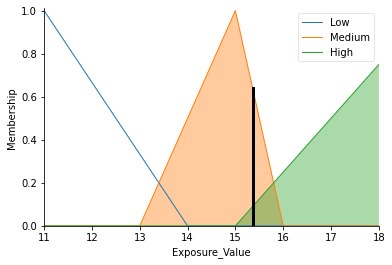

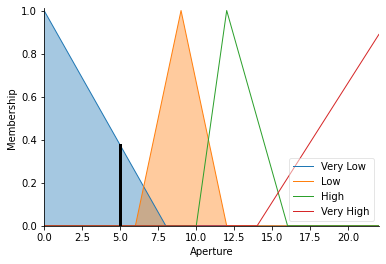

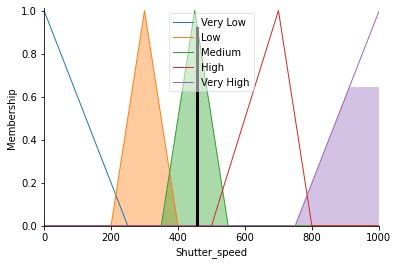

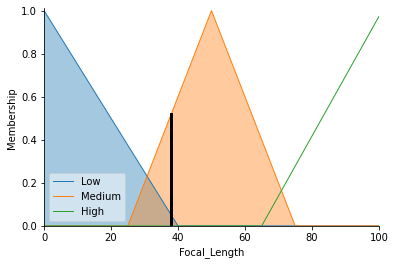

In [ ]:
cam_env.input['Brightness'] = 90
cam_env.input['Sensitivity'] = 1200
cam_env.input['Distance'] = 150


cam_env.compute()
print(cam_env.output)
print(cam_env.output['Exposure_Value'])
Exposure_Value.view(sim=cam_env)

print(cam_env.output['Aperture'])
Aperture.view(sim=cam_env)

print(cam_env.output['Shutter_speed'])
Shutter_speed.view(sim=cam_env)

print(cam_env.output['Focal_Length'])
Focal_Length.view(sim=cam_env)

**Mean of Maximum (MOM)**

OrderedDict([('Exposure_Value', 11.833333333333334), ('Aperture', 2.0), ('Focal_Length', 91.5), ('Shutter_speed', 990.0438095238094)])
11.833333333333334
2.0
990.0438095238094
91.5


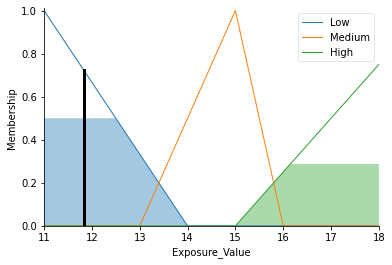

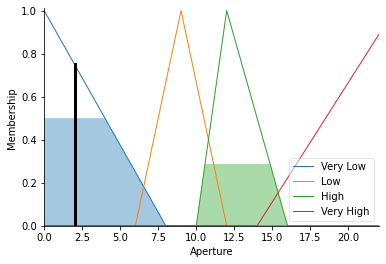

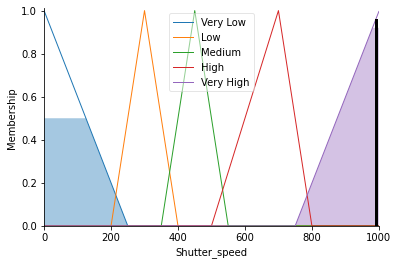

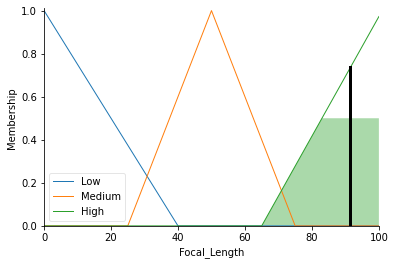

In [ ]:
cam_env.input['Brightness'] = 15
cam_env.input['Sensitivity'] =140
cam_env.input['Distance'] = 430
Exposure_Value.defuzzify_method="mom"
Aperture.defuzzify_method="mom"
Shutter_speed.defuzzify_method="mom"
Focal_Length.defuzzify_method="mom"


cam_env.compute()
print(cam_env.output)
print(cam_env.output['Exposure_Value'])
Exposure_Value.view(sim=cam_env)

print(cam_env.output['Aperture'])
Aperture.view(sim=cam_env)

print(cam_env.output['Shutter_speed'])
Shutter_speed.view(sim=cam_env)

print(cam_env.output['Focal_Length'])
Focal_Length.view(sim=cam_env)

**Smallest of Maximum (SOM)**

OrderedDict([('Exposure_Value', 13.8), ('Aperture', 17.6), ('Focal_Length', 35.0), ('Shutter_speed', 390.0)])
13.8
17.6
390.0
35.0


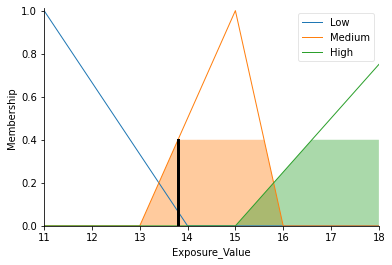

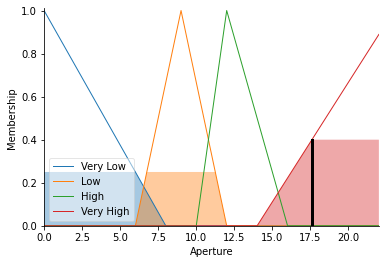

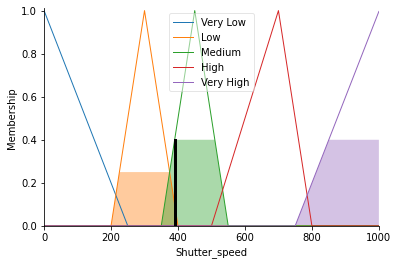

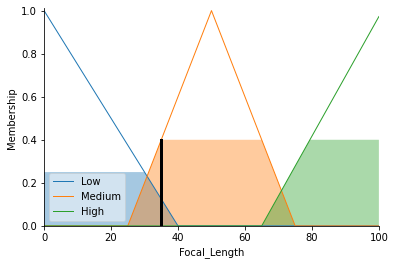

In [ ]:
cam_env.input['Brightness'] = 60
cam_env.input['Sensitivity'] =1000
cam_env.input['Distance'] = 75
Exposure_Value.defuzzify_method="som"  #min of maximum
Aperture.defuzzify_method="som"
Shutter_speed.defuzzify_method="som"
Focal_Length.defuzzify_method="som"



cam_env.compute()
print(cam_env.output)
print(cam_env.output['Exposure_Value'])
Exposure_Value.view(sim=cam_env)

print(cam_env.output['Aperture'])
Aperture.view(sim=cam_env)

print(cam_env.output['Shutter_speed'])
Shutter_speed.view(sim=cam_env)

print(cam_env.output['Focal_Length'])
Focal_Length.view(sim=cam_env)

**Largest of Maximum(lom)**

OrderedDict([('Exposure_Value', 15.0), ('Aperture', 9.0), ('Focal_Length', 50.0), ('Shutter_speed', 450.0)])
15.0
9.0
450.0
50.0


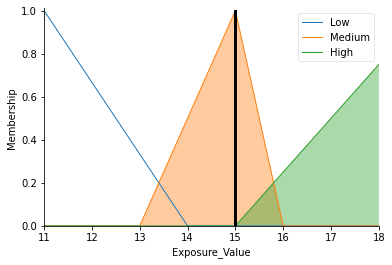

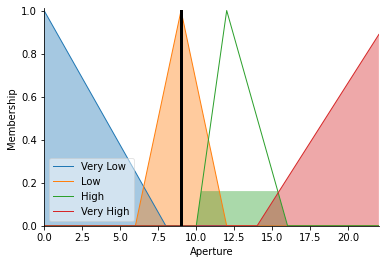

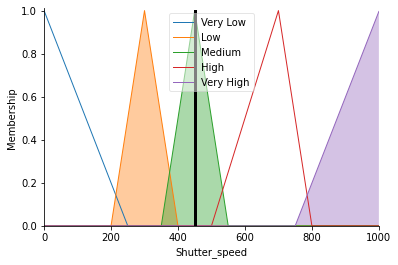

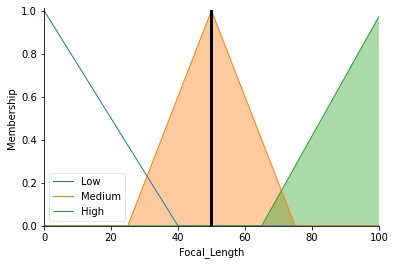

In [ ]:
cam_env.input['Brightness'] = 75
cam_env.input['Sensitivity'] = 600
cam_env.input['Distance'] = 350
Exposure_Value.defuzzify_method="lom"  #max of maximum
Aperture.defuzzify_method="lom"
Shutter_speed.defuzzify_method="lom"
Focal_Length.defuzzify_method="lom"

cam_env.compute()
print(cam_env.output)
print(cam_env.output['Exposure_Value'])
Exposure_Value.view(sim=cam_env)

print(cam_env.output['Aperture'])
Aperture.view(sim=cam_env)

print(cam_env.output['Shutter_speed'])
Shutter_speed.view(sim=cam_env)

print(cam_env.output['Focal_Length'])
Focal_Length.view(sim=cam_env)

**Bisector**

OrderedDict([('Exposure_Value', 15.13234674648663), ('Aperture', 5.005931790281917), ('Focal_Length', 79.54372717015828), ('Shutter_speed', 447.4079196428569)])
15.13234674648663
5.005931790281917
447.4079196428569
79.54372717015828


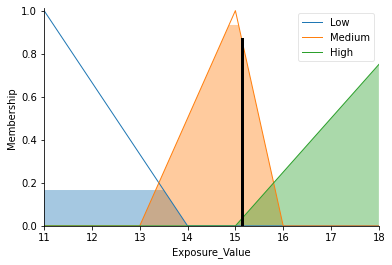

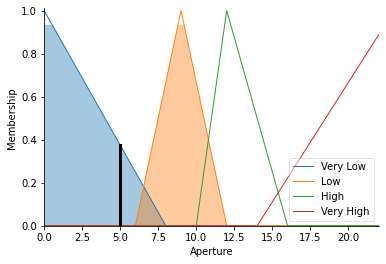

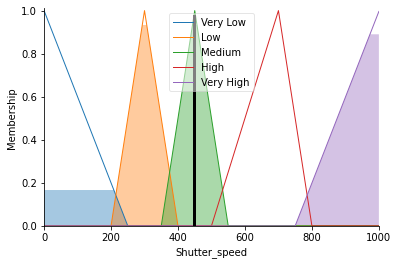

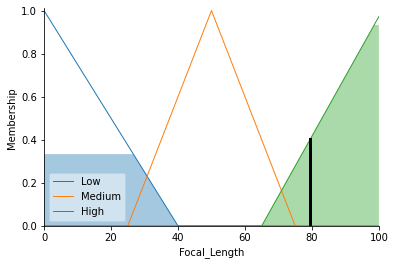

In [ ]:
cam_env.input['Brightness'] = 25
cam_env.input['Sensitivity'] = 155
cam_env.input['Distance'] = 355
Exposure_Value.defuzzify_method="bisector"  #The bisector method finds the vertical line that divides the fuzzy set into two sub-regions of equal area. It is sometimes, but not always, coincident with the centroid line.
Aperture.defuzzify_method="bisector"
Shutter_speed.defuzzify_method="bisector"
Focal_Length.defuzzify_method="bisector"


cam_env.compute()
print(cam_env.output)
print(cam_env.output['Exposure_Value'])
Exposure_Value.view(sim=cam_env)

print(cam_env.output['Aperture'])
Aperture.view(sim=cam_env)

print(cam_env.output['Shutter_speed'])
Shutter_speed.view(sim=cam_env)

print(cam_env.output['Focal_Length'])
Focal_Length.view(sim=cam_env)